In [1]:
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
#Function parse YOLO labels to absolute pixel values for bboxes
def parse_yolo_labels(label_path,img_width,img_height):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)
        boxes.append((x1, y1, x2, y2))
    return boxes

In [3]:
#draw bbox on image
# Function to draw bounding boxes on images
def draw_boxes(image, boxes):
    for box in boxes:
        x1, y1, x2, y2 = box
        color = (0, 255, 0)  # Green color for bounding boxes
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    return image


In [4]:
#draws the boxes on the n first images of the folder
def draw_boxes_for_first_n_images(images_folder, annotations_folder,n):
    #List image files
    image_files = os.listdir(images_folder)
    for image_file in image_files[:n]:
        #load the image
        img_path = os.path.join(images_folder, image_file)
        img = cv2.imread(img_path)
        img_height, img_width, _ = img.shape

        #get corresponding annotation file
        img_name = os.path.splitext(image_file)[0]
        annotation_path = os.path.join(annotations_folder,img_name + ".txt")

        #Parse YOLO labels
        boxes = parse_yolo_labels(annotation_path,img_width, img_height)

         # Draw bounding boxes on the image
        image_with_boxes = draw_boxes(img.copy(), boxes)

        # Display the image with bounding boxes
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title(f'Image: {image_file}')
        plt.axis('off')
        plt.show()






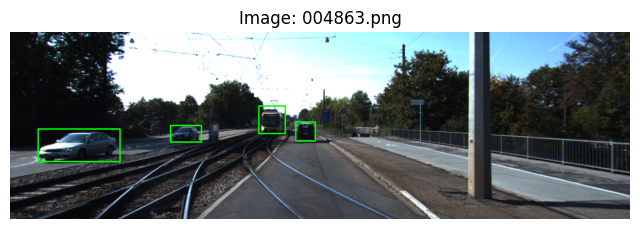

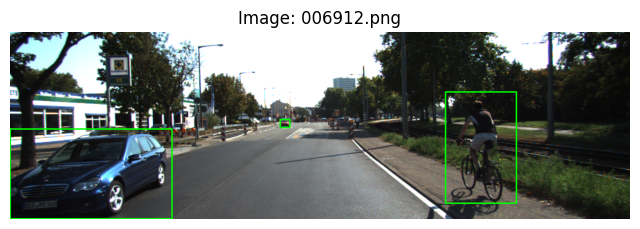

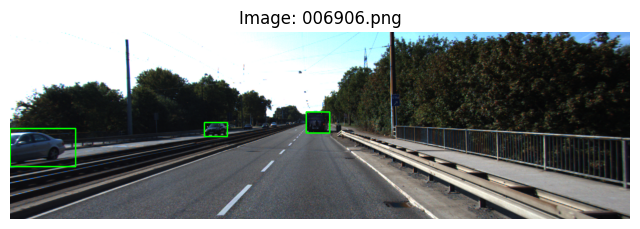

In [5]:
IMAGES_FOLDER = 'images'
ANNOTATIONS_FOLDER = 'annotations'
num_img_to_draw = 3
draw_boxes_for_first_n_images(IMAGES_FOLDER,ANNOTATIONS_FOLDER,num_img_to_draw)